**From File Upload**

In [3]:
# import Python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# regression package
import statsmodels.api as sm

# sentiment analysis packages
import re
import nltk
#nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
#nltk.download('stopwords')
from nltk.corpus import stopwords
#nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
# from textblob import TextBlob

# topic modeling packages
import gensim
from gensim import corpora

/Users/nguyenann/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/nguyenann/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


### Trump_16

In [2]:
#importing data
import pandas as pd
import numpy as np
trump_16=pd.read_csv("trump_16_geotagged_new.csv", index_col=0)
trump_16["GeoLocation"]=trump_16["GeoLocation"].str.strip()
trump_16

,Username,Datetime,Content,Likes,GeoLocation,ProfileLocation
0,ChiefSteef,2016-11-07 19:39:05+00:00,Voting isn't important this year if you're vot...,6.0,"Hancock, OH","Perrysburg, OH"
1,kendramichaelis,2016-11-06 21:09:43+00:00,Just witnessed an elderly man pay a waitress $...,4.0,"Hancock, OH",Napoleon
2,Jordan_Sabo,2016-11-03 21:12:01+00:00,"""We have inherited a budget crunch because of ...",0.0,"Hancock, OH","Ohio, USA"
3,dam_Stretch,2016-11-02 14:49:26+00:00,@gingerplussoul third who is to say that a rel...,4.0,"Hancock, OH",NaN
4,dam_Stretch,2016-11-02 14:47:50+00:00,@gingerplussoul second if God puts Trump in t...,6.0,"Hancock, OH",NaN
...,...,...,...,...,...,...
52397,em0morgue666,2016-10-20 01:57:03+00:00,.....no one has more respect for women than u ...,1.0,"Sacramento, CA",somewhere in hell
52398,shelbay_smalls,2016-10-20 01:53:39+00:00,*asks trump any question* it was hillarys fault,8.0,"Sacramento, CA",NaN
52399,shelbay_smalls,2016-10-20 01:53:04+00:00,I don't know how Hillary doesn't punch trump i...,3.0,"Sacramento, CA",NaN
52400,kaybeebaybee_,2016-10-20 01:38:28+00:00,also trump definitely referred to putin saying...,6.0,"Sacramento, CA","Honolulu, HI"


In [3]:
trump_16 = trump_16[trump_16['Datetime'] != '   Perry, AL']
trump_16 = trump_16[trump_16['Datetime'] != '   Raleigh, WV']
trump_16 = trump_16[trump_16['Datetime'] != '   Sarasota, FL']

In [4]:
trump_16['Datetime']=trump_16['Datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S%z'))
trump_16['Date'] = trump_16['Datetime'].apply(lambda x: x.date())
trump_16

,Username,Datetime,Content,Likes,GeoLocation,ProfileLocation,Date
0,ChiefSteef,2016-11-07 19:39:05+00:00,Voting isn't important this year if you're vot...,6.0,"Hancock, OH","Perrysburg, OH",2016-11-07
1,kendramichaelis,2016-11-06 21:09:43+00:00,Just witnessed an elderly man pay a waitress $...,4.0,"Hancock, OH",Napoleon,2016-11-06
2,Jordan_Sabo,2016-11-03 21:12:01+00:00,"""We have inherited a budget crunch because of ...",0.0,"Hancock, OH","Ohio, USA",2016-11-03
3,dam_Stretch,2016-11-02 14:49:26+00:00,@gingerplussoul third who is to say that a rel...,4.0,"Hancock, OH",NaN,2016-11-02
4,dam_Stretch,2016-11-02 14:47:50+00:00,@gingerplussoul second if God puts Trump in t...,6.0,"Hancock, OH",NaN,2016-11-02
...,...,...,...,...,...,...,...
52397,em0morgue666,2016-10-20 01:57:03+00:00,.....no one has more respect for women than u ...,1.0,"Sacramento, CA",somewhere in hell,2016-10-20
52398,shelbay_smalls,2016-10-20 01:53:39+00:00,*asks trump any question* it was hillarys fault,8.0,"Sacramento, CA",NaN,2016-10-20
52399,shelbay_smalls,2016-10-20 01:53:04+00:00,I don't know how Hillary doesn't punch trump i...,3.0,"Sacramento, CA",NaN,2016-10-20
52400,kaybeebaybee_,2016-10-20 01:38:28+00:00,also trump definitely referred to putin saying...,6.0,"Sacramento, CA","Honolulu, HI",2016-10-20


In [5]:
trump_16_agg = trump_16[['Username', 'Date', 'Content']].copy()

trump_16_agg

,Username,Date,Content
0,ChiefSteef,2016-11-07,Voting isn't important this year if you're vot...
1,kendramichaelis,2016-11-06,Just witnessed an elderly man pay a waitress $...
2,Jordan_Sabo,2016-11-03,"""We have inherited a budget crunch because of ..."
3,dam_Stretch,2016-11-02,@gingerplussoul third who is to say that a rel...
4,dam_Stretch,2016-11-02,@gingerplussoul second if God puts Trump in t...
...,...,...,...
52397,em0morgue666,2016-10-20,.....no one has more respect for women than u ...
52398,shelbay_smalls,2016-10-20,*asks trump any question* it was hillarys fault
52399,shelbay_smalls,2016-10-20,I don't know how Hillary doesn't punch trump i...
52400,kaybeebaybee_,2016-10-20,also trump definitely referred to putin saying...


In [6]:
trump_16_agg = trump_16_agg.groupby(['Username', 'Date'], as_index=False)['Content'].apply(lambda x: ','.join(x.astype(str)))
trump_16_agg

,Username,Date,Content
0,007Mcdonald,2016-10-20,@JudgeJeanine if Trump wins could there be a J...
1,00ayl_,2016-10-21,Hispanics voting for trump really be having an...
2,00cilla,2016-11-06,Someone class sneezed so I said bless you .lol...
3,013117_,2016-10-24,the mva shit is pushed 45$ to get my id change...
4,06alpha,2016-10-03,trump is no genius. He is a pathetic liar who ...
...,...,...,...
28861,zsert7,2016-11-06,@FoxBusiness @realDonaldTrump @HillaryClinton ...
28862,zsert7,2016-11-07,@realDonaldTrump That shouldn't be a hard deci...
28863,zsibritajanos,2016-10-20,#EPIC\n#DonaldTrump #trump\n#HillaryClinton #c...
28864,zsimon98,2016-11-04,This is why we can't vote Trump. https://t.co/...


In [7]:
# Remove emojis from tweets
def remove_emoji(string):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [8]:
#remove_emoji(trump_16_agg['Content'][0])

In [9]:
# Remove https:
trump_16_agg['Content'] = trump_16_agg['Content'].apply(lambda x: re.sub('http[s]?://\S+', '', str(x)))

In [10]:
trump_16_agg['Content'] = trump_16_agg['Content'].apply(lambda x: remove_emoji(x))
trump_16_agg

,Username,Date,Content
0,007Mcdonald,2016-10-20,@JudgeJeanine if Trump wins could there be a J...
1,00ayl_,2016-10-21,Hispanics voting for trump really be having an...
2,00cilla,2016-11-06,Someone class sneezed so I said bless you .lol...
3,013117_,2016-10-24,the mva shit is pushed 45$ to get my id change...
4,06alpha,2016-10-03,trump is no genius. He is a pathetic liar who ...
...,...,...,...
28861,zsert7,2016-11-06,@FoxBusiness @realDonaldTrump @HillaryClinton ...
28862,zsert7,2016-11-07,@realDonaldTrump That shouldn't be a hard deci...
28863,zsibritajanos,2016-10-20,#EPIC\n#DonaldTrump #trump\n#HillaryClinton #c...
28864,zsimon98,2016-11-04,This is why we can't vote Trump.


In [56]:
import langid
langid.classify("I like candies.")

('it', -24.44071626663208)

In [11]:
import langid
lang = trump_16_agg["Content"].apply(lambda x: langid.classify(x))
trump_16_agg['Language']= lang.apply(lambda x: x[0])
trump_16_agg

,Username,Date,Content,Language
0,007Mcdonald,2016-10-20,@JudgeJeanine if Trump wins could there be a J...,en
1,00ayl_,2016-10-21,Hispanics voting for trump really be having an...,en
2,00cilla,2016-11-06,Someone class sneezed so I said bless you .lol...,en
3,013117_,2016-10-24,the mva shit is pushed 45$ to get my id change...,en
4,06alpha,2016-10-03,trump is no genius. He is a pathetic liar who ...,en
...,...,...,...,...
28861,zsert7,2016-11-06,@FoxBusiness @realDonaldTrump @HillaryClinton ...,en
28862,zsert7,2016-11-07,@realDonaldTrump That shouldn't be a hard deci...,en
28863,zsibritajanos,2016-10-20,#EPIC\n#DonaldTrump #trump\n#HillaryClinton #c...,it
28864,zsimon98,2016-11-04,This is why we can't vote Trump.,en


In [12]:
trump_16_agg.to_csv('trump_16_agg_lang.csv')

In [13]:
#trump_16_agg["Language"].value_counts()

In [14]:
trump_16_agg_2 = trump_16_agg.copy()
#trump_16_agg_2 = trump_16_agg_2[trump_16_agg_2['Language']='en']
trump_16_agg_2.drop(trump_16_agg_2.loc[trump_16_agg_2['Language']!='en'].index, inplace=True)
trump_16_agg_2

,Username,Date,Content,Language
0,007Mcdonald,2016-10-20,@JudgeJeanine if Trump wins could there be a J...,en
1,00ayl_,2016-10-21,Hispanics voting for trump really be having an...,en
2,00cilla,2016-11-06,Someone class sneezed so I said bless you .lol...,en
3,013117_,2016-10-24,the mva shit is pushed 45$ to get my id change...,en
4,06alpha,2016-10-03,trump is no genius. He is a pathetic liar who ...,en
...,...,...,...,...
28860,zschwaller,2016-10-31,@LeeLeepatel57 acting like your ass will have ...,en
28861,zsert7,2016-11-06,@FoxBusiness @realDonaldTrump @HillaryClinton ...,en
28862,zsert7,2016-11-07,@realDonaldTrump That shouldn't be a hard deci...,en
28864,zsimon98,2016-11-04,This is why we can't vote Trump.,en


In [15]:
#Sentiment analysis of every tweet
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
from nltk import sent_tokenize,word_tokenize 
def get_sentiment(tweet):
    headers = ['pos','neg','neu','compound']
    analyzer = SentimentIntensityAnalyzer()
    sentences = sent_tokenize(tweet)
    pos=compound=neu=neg=0
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        #pos+=vs['pos']/(len(sentences))
        compound+=vs['compound']/(len(sentences))
        #neu+=vs['neu']/(len(sentences))
        #neg+=vs['neg']/(len(sentences))
    return compound


In [16]:
trump_16_agg_2["Compound_Sentiment"]=trump_16_agg_2['Content'].apply(lambda x: get_sentiment(x))
trump_16_agg_2

,Username,Date,Content,Language,Compound_Sentiment
0,007Mcdonald,2016-10-20,@JudgeJeanine if Trump wins could there be a J...,en,0.61365
1,00ayl_,2016-10-21,Hispanics voting for trump really be having an...,en,-0.62490
2,00cilla,2016-11-06,Someone class sneezed so I said bless you .lol...,en,0.53375
3,013117_,2016-10-24,the mva shit is pushed 45$ to get my id change...,en,-0.74850
4,06alpha,2016-10-03,trump is no genius. He is a pathetic liar who ...,en,-0.47230
...,...,...,...,...,...
28860,zschwaller,2016-10-31,@LeeLeepatel57 acting like your ass will have ...,en,-0.25000
28861,zsert7,2016-11-06,@FoxBusiness @realDonaldTrump @HillaryClinton ...,en,0.81100
28862,zsert7,2016-11-07,@realDonaldTrump That shouldn't be a hard deci...,en,0.35565
28864,zsimon98,2016-11-04,This is why we can't vote Trump.,en,0.00000


In [17]:
trump_16_agg_2 = trump_16_agg_2.drop_duplicates('Content', ignore_index=True)
trump_16_agg_2

,Username,Date,Content,Language,Compound_Sentiment
0,007Mcdonald,2016-10-20,@JudgeJeanine if Trump wins could there be a J...,en,0.61365
1,00ayl_,2016-10-21,Hispanics voting for trump really be having an...,en,-0.62490
2,00cilla,2016-11-06,Someone class sneezed so I said bless you .lol...,en,0.53375
3,013117_,2016-10-24,the mva shit is pushed 45$ to get my id change...,en,-0.74850
4,06alpha,2016-10-03,trump is no genius. He is a pathetic liar who ...,en,-0.47230
...,...,...,...,...,...
27741,zschwaller,2016-10-31,@LeeLeepatel57 acting like your ass will have ...,en,-0.25000
27742,zsert7,2016-11-06,@FoxBusiness @realDonaldTrump @HillaryClinton ...,en,0.81100
27743,zsert7,2016-11-07,@realDonaldTrump That shouldn't be a hard deci...,en,0.35565
27744,zsimon98,2016-11-04,This is why we can't vote Trump.,en,0.00000


In [18]:
trump_16_agg_2.to_csv('trump_16_with_sentiment_score.csv')

In [20]:
mean_sent_trump = pd.DataFrame(trump_16_agg_2.groupby("Date").mean())
mean_sent_trump.reset_index(inplace=True)
mean_sent_trump.columns = [["Date","Trump_Sentiment"]]

mean_sent_trump

/var/folders/gv/sd0811cx6x99ygxxh5_20kvr0000gn/T/ipykernel_7482/414993656.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_sent_trump = pd.DataFrame(trump_16_agg_2.groupby("Date").mean())


,Date,Trump_Sentiment
0,2016-10-01,0.027931
1,2016-10-02,-0.029213
2,2016-10-03,-0.030651
3,2016-10-04,0.016578
4,2016-10-05,0.031736
5,2016-10-06,-0.002036
6,2016-10-07,0.019346
7,2016-10-08,-0.023800
8,2016-10-09,-0.014509
9,2016-10-10,-0.015288


### Hillary_16

In [21]:
hillary_16 = pd.read_csv('hillary_16_geotagged_new.csv', index_col=0)
hillary_16 = hillary_16[hillary_16['Datetime'] != '   Raleigh, WV']
hillary_16['Datetime']=hillary_16['Datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S%z'))
hillary_16['Date'] = hillary_16['Datetime'].apply(lambda x: x.date())
hillary_16

,Username,Datetime,Content,Likes,GeoLocation,ProfileLocation,Date
0,AnniKramer11,2016-11-06 22:03:48+00:00,Enjoyed cleaning house on my FB account. Don't...,2.0,"Hancock, OH","Findlay, Ohio USA",2016-11-06
1,Coffeehousejoe,2016-11-05 18:51:21+00:00,.@HillaryClinton Why would you have someone wh...,0.0,"Hancock, OH","Findlay, OH",2016-11-05
2,Coffeehousejoe,2016-11-04 17:50:41+00:00,@HillaryClinton @mcuban I did. It wasn't for you.,0.0,"Hancock, OH","Findlay, OH",2016-11-04
3,Coffeehousejoe,2016-11-02 18:44:57+00:00,@johnpodesta @HillaryClinton Why did Hillary C...,0.0,"Hancock, OH","Findlay, OH",2016-11-02
4,Coffeehousejoe,2016-11-02 15:44:47+00:00,.@HillaryClinton At a campaign rally the other...,1.0,"Hancock, OH","Findlay, OH",2016-11-02
...,...,...,...,...,...,...,...
39381,mando6268,2016-10-16 16:53:28+00:00,@FoxNews @DineshDSouza @JudgeJeanine @HillaryC...,0.0,"Sacramento, CA",NaN,2016-10-16
39382,adisonkailey,2016-10-16 14:45:26+00:00,"It's not ""rigged"", especially if they make fun...",2.0,"Sacramento, CA",from eden,2016-10-16
39383,LarryWynn7,2016-10-16 04:34:48+00:00,To all Trump accusers: U all are liars. Why do...,0.0,"Sacramento, CA",NaN,2016-10-16
39384,adisonkailey,2016-10-15 18:42:19+00:00,"This is so immature, ""crooked Hillary"". You so...",0.0,"Sacramento, CA",from eden,2016-10-15


In [22]:
hillary_16 = hillary_16[hillary_16['Datetime'] != '   Raleigh, WV']

In [24]:
# hillary_16['Datetime']=hillary_16['Datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S%z'))
# hillary_16['Date'] = hillary_16['Datetime'].apply(lambda x: x.date())
# hillary_16

In [25]:
hillary_16_agg = hillary_16[['Username', 'Date', 'Content']].copy()
hillary_16_agg = hillary_16_agg.groupby(['Username', 'Date'], as_index=False)['Content'].apply(lambda x: ','.join(x.astype(str)))
hillary_16_agg

,Username,Date,Content
0,002ChrisR,2016-10-02,@FoxNews @HillaryClinton - Ni doubt Hillary fe...
1,002ChrisR,2016-11-01,@HillaryClinton I didn't realize Comey was run...
2,002ChrisR,2016-11-03,@FoxNews @HillaryClinton - had to get this Cli...
3,0126Jerry,2016-10-05,"Go Trump Go, beat Hillary"
4,01_Boxer,2016-10-26,.@HillaryClinton We gave you an early present ...
...,...,...,...
21159,zsert7,2016-11-05,@FoxBusiness @HillaryClinton @realDonaldTrump ...
21160,zsert7,2016-11-06,@FoxBusiness @realDonaldTrump @HillaryClinton ...
21161,zsert7,2016-11-07,@FoxBusiness @HillaryClinton She'll never get ...
21162,zvazda,2016-11-07,Tomorrow morning I'm going to wake up at 6 AM ...


In [26]:
# Remove https:
hillary_16_agg['Content'] = hillary_16_agg['Content'].apply(lambda x: re.sub('http[s]?://\S+', '', str(x)))

In [27]:
# Remove emojis
hillary_16_agg['Content'] = hillary_16_agg['Content'].apply(lambda x: remove_emoji(x))
hillary_16_agg

,Username,Date,Content
0,002ChrisR,2016-10-02,@FoxNews @HillaryClinton - Ni doubt Hillary fe...
1,002ChrisR,2016-11-01,@HillaryClinton I didn't realize Comey was run...
2,002ChrisR,2016-11-03,@FoxNews @HillaryClinton - had to get this Cli...
3,0126Jerry,2016-10-05,"Go Trump Go, beat Hillary"
4,01_Boxer,2016-10-26,.@HillaryClinton We gave you an early present ...
...,...,...,...
21159,zsert7,2016-11-05,@FoxBusiness @HillaryClinton @realDonaldTrump ...
21160,zsert7,2016-11-06,@FoxBusiness @realDonaldTrump @HillaryClinton ...
21161,zsert7,2016-11-07,@FoxBusiness @HillaryClinton She'll never get ...
21162,zvazda,2016-11-07,Tomorrow morning I'm going to wake up at 6 AM ...


In [28]:
data3 = hillary_16_agg["Content"].apply(lambda x: langid.classify(x))
hillary_16_agg['Language']= data3.apply(lambda x: x[0])
hillary_16_agg

,Username,Date,Content,Language
0,002ChrisR,2016-10-02,@FoxNews @HillaryClinton - Ni doubt Hillary fe...,en
1,002ChrisR,2016-11-01,@HillaryClinton I didn't realize Comey was run...,en
2,002ChrisR,2016-11-03,@FoxNews @HillaryClinton - had to get this Cli...,en
3,0126Jerry,2016-10-05,"Go Trump Go, beat Hillary",it
4,01_Boxer,2016-10-26,.@HillaryClinton We gave you an early present ...,en
...,...,...,...,...
21159,zsert7,2016-11-05,@FoxBusiness @HillaryClinton @realDonaldTrump ...,en
21160,zsert7,2016-11-06,@FoxBusiness @realDonaldTrump @HillaryClinton ...,en
21161,zsert7,2016-11-07,@FoxBusiness @HillaryClinton She'll never get ...,en
21162,zvazda,2016-11-07,Tomorrow morning I'm going to wake up at 6 AM ...,en


In [29]:
# hillary_16_agg["Language"].value_counts()

In [30]:
hillary_16_en = hillary_16_agg[hillary_16_agg['Language'] == 'en']
hillary_16_en

,Username,Date,Content,Language
0,002ChrisR,2016-10-02,@FoxNews @HillaryClinton - Ni doubt Hillary fe...,en
1,002ChrisR,2016-11-01,@HillaryClinton I didn't realize Comey was run...,en
2,002ChrisR,2016-11-03,@FoxNews @HillaryClinton - had to get this Cli...,en
4,01_Boxer,2016-10-26,.@HillaryClinton We gave you an early present ...,en
5,02julioo,2016-10-05,My niece's teacher told her that Donald trump ...,en
...,...,...,...,...
21159,zsert7,2016-11-05,@FoxBusiness @HillaryClinton @realDonaldTrump ...,en
21160,zsert7,2016-11-06,@FoxBusiness @realDonaldTrump @HillaryClinton ...,en
21161,zsert7,2016-11-07,@FoxBusiness @HillaryClinton She'll never get ...,en
21162,zvazda,2016-11-07,Tomorrow morning I'm going to wake up at 6 AM ...,en


In [31]:
hillary_16_noten = hillary_16_agg[hillary_16_agg['Language'] != 'en']
hillary_16_noten

,Username,Date,Content,Language
3,0126Jerry,2016-10-05,"Go Trump Go, beat Hillary",it
64,1661Riddell,2016-11-04,@HillaryClinton Game over!,it
128,1stSGTJR,2016-11-06,@teleSURtv @wikileaks @HillaryClinton,fi
204,3atth33,2016-11-07,@HillaryClinton in like Flynn,it
233,4361a4be893d4c0,2016-10-04,@CNN #CNN @HillaryClinton TRUMP OUR VETERANS ...,fi
...,...,...,...,...
21111,z06vt1,2016-11-05,. @HillaryClinton @realDonaldTrump #TrumpPen...,tr
21114,zabalaaldia,2016-10-03,Critican a Hillary Clinton por usar Alicia Mac...,es
21118,zacjoseph8,2016-10-28,@FoxNews @realDonaldTrump @HillaryClinton LOCK...,it
21149,zoraida31176901,2016-10-10,"@HillaryClinton lovely,@HillaryClinton lovely",es


In [32]:
#!pip install langid

In [33]:
#!pip install deep_translator

In [34]:
from deep_translator import GoogleTranslator

def translate_text(text):
    return GoogleTranslator(source='auto', target='en').translate(text)

In [35]:
# to_translate = 'Trump la nguoi My'
# translated = translate_text(to_translate)
# translated
# outpout -> Ich möchte diesen Text übersetzen

In [36]:
hillary_16_noten['Content']=hillary_16_noten['Content'].apply(lambda x: translate_text(x))

/var/folders/gv/sd0811cx6x99ygxxh5_20kvr0000gn/T/ipykernel_7482/1967714868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hillary_16_noten['Content']=hillary_16_noten['Content'].apply(lambda x: translate_text(x))


In [37]:
hillary_16_noten

,Username,Date,Content,Language
3,0126Jerry,2016-10-05,"Go Trump Go, beat Hillary",it
64,1661Riddell,2016-11-04,@HillaryClinton Game over!,it
128,1stSGTJR,2016-11-06,@teleSURtv @wikileaks @HillaryClinton,fi
204,3atth33,2016-11-07,@HillaryClinton in like Flynn,it
233,4361a4be893d4c0,2016-10-04,@CNN #CNN @HillaryClinton TRUMP OUR VETERANS ...,fi
...,...,...,...,...
21111,z06vt1,2016-11-05,. @HillaryClinton @realDonaldTrump #TrumpPen...,tr
21114,zabalaaldia,2016-10-03,They criticize Hillary Clinton for using Alici...,es
21118,zacjoseph8,2016-10-28,@FoxNews @realDonaldTrump @HillaryClinton LOCK...,it
21149,zoraida31176901,2016-10-10,"@HillaryClinton lovely,@HillaryClinton lovely",es


In [38]:
hillary_16_agg_2 = pd.concat([hillary_16_en, hillary_16_noten], ignore_index=True)
hillary_16_agg_2

,Username,Date,Content,Language
0,002ChrisR,2016-10-02,@FoxNews @HillaryClinton - Ni doubt Hillary fe...,en
1,002ChrisR,2016-11-01,@HillaryClinton I didn't realize Comey was run...,en
2,002ChrisR,2016-11-03,@FoxNews @HillaryClinton - had to get this Cli...,en
3,01_Boxer,2016-10-26,.@HillaryClinton We gave you an early present ...,en
4,02julioo,2016-10-05,My niece's teacher told her that Donald trump ...,en
...,...,...,...,...
21159,z06vt1,2016-11-05,. @HillaryClinton @realDonaldTrump #TrumpPen...,tr
21160,zabalaaldia,2016-10-03,They criticize Hillary Clinton for using Alici...,es
21161,zacjoseph8,2016-10-28,@FoxNews @realDonaldTrump @HillaryClinton LOCK...,it
21162,zoraida31176901,2016-10-10,"@HillaryClinton lovely,@HillaryClinton lovely",es


In [39]:
hillary_16_agg_2["Compound_Sentiment"]=hillary_16_agg_2['Content'].apply(lambda x: get_sentiment(x))
hillary_16_agg_2

,Username,Date,Content,Language,Compound_Sentiment
0,002ChrisR,2016-10-02,@FoxNews @HillaryClinton - Ni doubt Hillary fe...,en,-0.443350
1,002ChrisR,2016-11-01,@HillaryClinton I didn't realize Comey was run...,en,0.071300
2,002ChrisR,2016-11-03,@FoxNews @HillaryClinton - had to get this Cli...,en,0.000000
3,01_Boxer,2016-10-26,.@HillaryClinton We gave you an early present ...,en,0.152850
4,02julioo,2016-10-05,My niece's teacher told her that Donald trump ...,en,-0.836000
...,...,...,...,...,...
21159,z06vt1,2016-11-05,. @HillaryClinton @realDonaldTrump #TrumpPen...,tr,0.000000
21160,zabalaaldia,2016-10-03,They criticize Hillary Clinton for using Alici...,es,0.051600
21161,zacjoseph8,2016-10-28,@FoxNews @realDonaldTrump @HillaryClinton LOCK...,it,0.000000
21162,zoraida31176901,2016-10-10,"@HillaryClinton lovely,@HillaryClinton lovely",es,0.585900


In [40]:
hillary_16_agg_2.to_csv('hillary_16_with_sentiment_score.csv')

In [42]:
mean_sent_hillary = pd.DataFrame(hillary_16_agg_2.groupby("Date").mean())
mean_sent_hillary.reset_index(inplace=True)
mean_sent_hillary.columns = [["Date","Hillary_Sentiment"]]

mean_sent_hillary

/var/folders/gv/sd0811cx6x99ygxxh5_20kvr0000gn/T/ipykernel_7482/1301235577.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_sent_hillary = pd.DataFrame(hillary_16_agg_2.groupby("Date").mean())


,Date,Hillary_Sentiment
0,2016-10-01,0.001267
1,2016-10-02,-0.011843
2,2016-10-03,0.016157
3,2016-10-04,-0.000519
4,2016-10-05,-0.012960
5,2016-10-06,0.009281
6,2016-10-07,-0.011352
7,2016-10-08,-0.065209
8,2016-10-09,-0.018892
9,2016-10-10,0.003479


### Plot mean sentiment scores overtime

In [43]:
# ax = mean_sent_trump.plot()
# mean_sent_hillary.plot(ax=ax)

# plt.show()

In [44]:
mean_sent = mean_sent_trump.merge(mean_sent_hillary)
mean_sent

,Date,Trump_Sentiment,Hillary_Sentiment
0,2016-10-01,0.027931,0.001267
1,2016-10-02,-0.029213,-0.011843
2,2016-10-03,-0.030651,0.016157
3,2016-10-04,0.016578,-0.000519
4,2016-10-05,0.031736,-0.012960
5,2016-10-06,-0.002036,0.009281
6,2016-10-07,0.019346,-0.011352
7,2016-10-08,-0.023800,-0.065209
8,2016-10-09,-0.014509,-0.018892
9,2016-10-10,-0.015288,0.003479


In [45]:
mean_sent.columns = ['Date', 'Trump_Sentiment','Hillary_Sentiment']

In [46]:
mean_sent.columns

Index(['Date', 'Trump_Sentiment', 'Hillary_Sentiment'], dtype='object')

In [47]:
mean_sent['Date'] = pd.to_datetime(mean_sent.Date) 

In [48]:
mean_sent

,Date,Trump_Sentiment,Hillary_Sentiment
0,2016-10-01,0.027931,0.001267
1,2016-10-02,-0.029213,-0.011843
2,2016-10-03,-0.030651,0.016157
3,2016-10-04,0.016578,-0.000519
4,2016-10-05,0.031736,-0.012960
5,2016-10-06,-0.002036,0.009281
6,2016-10-07,0.019346,-0.011352
7,2016-10-08,-0.023800,-0.065209
8,2016-10-09,-0.014509,-0.018892
9,2016-10-10,-0.015288,0.003479


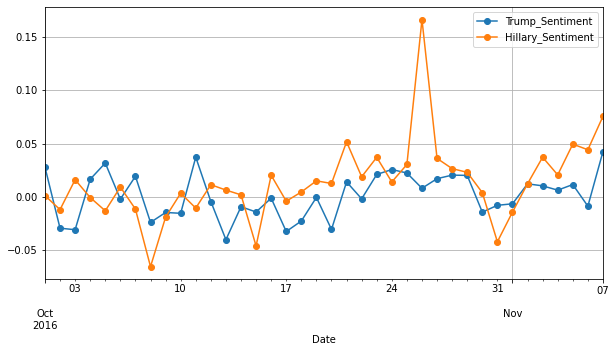

In [49]:
mean_sent.plot(x='Date', y=['Trump_Sentiment', 'Hillary_Sentiment'], style="o-",
               figsize=(10,5), grid=True)
#plt.savefig('trump_hillary_sentiment.png')

### WordCloud

In [13]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])

In [26]:
hil = pd.read_csv('hillary_16_with_sentiment_score.csv', index_col =0)

In [27]:
start_date = '2016-10-24'
end_date = '2016-10-26'
# Select DataFrame rows between two dates
date_int = (hil['Date'] >= start_date) & (hil['Date'] <= end_date)
h= hil.loc[date_int]
h

,Username,Date,Content,Language,Compound_Sentiment
3,01_Boxer,2016-10-26,.@HillaryClinton We gave you an early present ...,en,0.15285
54,157_devin,2016-10-24,"If @HillaryClinton wins, United States is scre...",en,0.51060
55,15Brinkley,2016-10-26,@HillaryClinton So what. Endorsed Obama too an...,en,0.12500
78,19JoJo65,2016-10-26,@FoxNews @HillaryClinton -She does understand ...,en,-0.03040
88,1FlaHart,2016-10-25,@simplymarcoo @rudymancuso @awkwardpuppets @Hi...,en,0.00000
...,...,...,...,...,...
21083,swalter7777,2016-10-25,@HillaryClinton,it,0.00000
21099,therealADWarren,2016-10-26,@FoxNews @realDonaldTrump @HillaryClinton .......,it,0.00000
21113,tmcsjgw18,2016-10-25,@missLtoe @JulieAnnSilver @HillaryClinton Exce...,nl,0.70670
21126,tylerherron8,2016-10-26,@HillaryClinton sad birthday dark lord clinton,it,-0.47670


In [28]:
hil_pos = h[h['Compound_Sentiment'] > 0] # Search for the tweets with positive sentiment to investigate

In [29]:
# Remove some keywords not revealing much information
hil_pos['Content'] = hil_pos['Content'].apply(lambda x: re.sub('http[s]?://\S+', '', str(x)))
hil_pos['Content'] = hil_pos['Content'].apply(lambda x: x.replace('amp', ''))
hil_pos['Content'] = hil_pos['Content'].apply(lambda x: x.replace('HillaryClinton', ''))

/var/folders/gv/sd0811cx6x99ygxxh5_20kvr0000gn/T/ipykernel_28977/2519963144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hil_pos['Content'] = hil_pos['Content'].apply(lambda x: re.sub('http[s]?://\S+', '', str(x)))
/var/folders/gv/sd0811cx6x99ygxxh5_20kvr0000gn/T/ipykernel_28977/2519963144.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hil_pos['Content'] = hil_pos['Content'].apply(lambda x: x.replace('amp', ''))
/var/folders/gv/sd0811cx6x99ygxxh5_20kvr0000gn/T/ipykernel_28977/2519963144.py:4: Se

In [30]:
hil_pos['Content'] = hil_pos['Content'].apply(lambda x: x.replace('realDonaldTrump', ''))
hil_pos['Content'] = hil_pos['Content'].apply(lambda x: x.replace('President', ''))
hil_pos['Content'] = hil_pos['Content'].apply(lambda x: x.replace('trump', ''))
hil_pos['Content'] = hil_pos['Content'].apply(lambda x: x.replace('people', ''))

/var/folders/gv/sd0811cx6x99ygxxh5_20kvr0000gn/T/ipykernel_28977/1593197870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hil_pos['Content'] = hil_pos['Content'].apply(lambda x: x.replace('realDonaldTrump', ''))
/var/folders/gv/sd0811cx6x99ygxxh5_20kvr0000gn/T/ipykernel_28977/1593197870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hil_pos['Content'] = hil_pos['Content'].apply(lambda x: x.replace('President', ''))
/var/folders/gv/sd0811cx6x99ygxxh5_20kvr0000gn/T/ipykernel_28977/1593197870.py:3: 

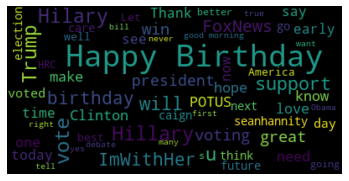

In [31]:
# Hillary 2016
hilpos = " ".join(tweet for tweet in hil_pos.Content)
wordcloud = WordCloud(stopwords=stopwords,max_words=60).generate(hilpos) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.savefig('hillary16.png')
plt.show()